In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import PIL
import keras
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from keras.layers import Activation,Dropout, Flatten, Dense, Input
from keras.models import load_model, Model, Sequential
from keras.layers import concatenate
from keras.datasets import mnist
from keras import backend as K
from keras.engine.topology import Layer
np.random.seed(7)

In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [0]:
x_train.shape

(60000, 28, 28)

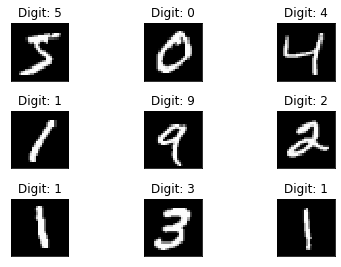

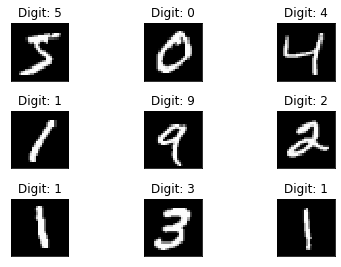

In [0]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [0]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [0]:
from keras.utils import to_categorical
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [0]:
def MyModel(input_shape):
    X_input=Input(input_shape)

    lay1=Conv2D(2,kernel_size=(1,1),activation='relu',padding='same')(X_input)
    lay1=Conv2D(2,kernel_size=(7,7),strides=(2,2),activation='relu',padding='same')(lay1)
    lay1=Conv2D(2,kernel_size=(1,1),activation='relu',padding='same')(lay1)
    lay1=MaxPool2D(pool_size=(7,7),strides=(2,2),padding='same')(lay1)

    lay2=Conv2D(4,kernel_size=(1,1),activation='relu',padding='same')(X_input)
    lay2=Conv2D(4,kernel_size=(7,7),strides=(2,2),activation='relu',padding='same')(lay2)
    lay2=Conv2D(4,kernel_size=(1,1),activation='relu',padding='same')(lay2)
    lay2=MaxPool2D(pool_size=(5,5),strides=(2,2),padding='same')(lay2)
    
    lay3=Conv2D(6,kernel_size=(1,1),activation='relu',padding='same')(X_input)
    lay3=Conv2D(6,kernel_size=(5,5),strides=(2,2),activation='relu',padding='same')(lay3)
    lay3=Conv2D(6,kernel_size=(1,1),activation='relu',padding='same')(lay3)
    lay3=MaxPool2D(pool_size=(5,5),strides=(2,2),padding='same')(lay3)

    fc=concatenate([lay1,lay2,lay3])
    fc=Flatten()(fc)
    fc=Dense(10,activation='relu')(fc)
    
    output=Dense(10,activation='softmax')(fc)
    model=Model(inputs=X_input,outputs=output,name='handwritten-digit-recognizer')
    return model

In [0]:
mnist_model3=MyModel(x_train.shape[1:])
mnist_model3.summary()

Model: "handwritten-digit-recognizer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_81 (Conv2D)              (None, 28, 28, 2)    4           input_17[0][0]                   
__________________________________________________________________________________________________
conv2d_84 (Conv2D)              (None, 28, 28, 4)    8           input_17[0][0]                   
__________________________________________________________________________________________________
conv2d_87 (Conv2D)              (None, 28, 28, 6)    12          input_17[0][0]                   
_______________________________________________________________________

In [0]:
adam2=keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
mnist_model3.compile(loss='categorical_crossentropy', optimizer=adam2, metrics=['accuracy'])
hist3=mnist_model3.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 71us/step - loss: 5.8519 - accuracy: 0.1039 - val_loss: 2.3152 - val_accuracy: 0.1014
Epoch 2/50
60000/60000 [==============================] - 4s 65us/step - loss: 2.3078 - accuracy: 0.1069 - val_loss: 2.3049 - val_accuracy: 0.1090
Epoch 3/50
60000/60000 [==============================] - 4s 65us/step - loss: 2.3031 - accuracy: 0.1104 - val_loss: 2.3033 - val_accuracy: 0.1114
Epoch 4/50
60000/60000 [==============================] - 4s 64us/step - loss: 2.3016 - accuracy: 0.1114 - val_loss: 2.3026 - val_accuracy: 0.1123
Epoch 5/50
60000/60000 [==============================] - 4s 64us/step - loss: 2.3004 - accuracy: 0.1128 - val_loss: 2.3017 - val_accuracy: 0.1138
Epoch 6/50
60000/60000 [==============================] - 4s 64us/step - loss: 2.2902 - accuracy: 0.1230 - val_loss: 2.2690 - val_accuracy: 0.1388
Epoch 7/50
60000/60000 [==============================] - 4s 64us/st

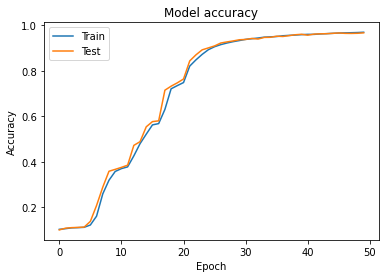

In [0]:
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

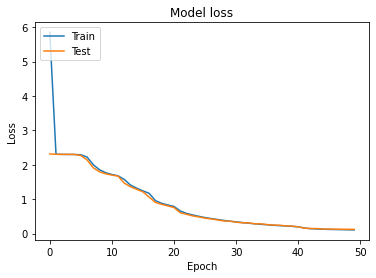

In [0]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
def MyModel3(input_shape):
    X_input=Input(input_shape)

    # lay1=Conv2D(2,kernel_size=(1,1),activation='relu',padding='same')(X_input)
    lay1=Conv2D(2,kernel_size=(1,1),strides=(2,2),activation='relu',padding='same')(X_input)
    # lay1=Conv2D(2,kernel_size=(1,1),activation='relu',padding='same')(lay1)
    lay1=MaxPool2D(pool_size=(3,3),strides=(2,2),padding='same')(lay1)
    lay1=BatchNormalization()(lay1)

    # lay1_=BatchNormalization()

    # lay2=Conv2D(4,kernel_size=(1,1),activation='relu',padding='same')(X_input)
    lay2=Conv2D(4,kernel_size=(1,1),strides=(2,2),activation='relu',padding='same')(X_input)
    # lay2=Conv2D(4,kernel_size=(1,1),activation='relu',padding='same')(lay2)
    lay2=MaxPool2D(pool_size=(3,3),strides=(2,2),padding='same')(lay2)
    lay2=BatchNormalization()(lay2)
    # lay2_=BatchNormalization()

    # lay3=Conv2D(6,kernel_size=(1,1),activation='relu',padding='same')(X_input)
    lay3=Conv2D(4,kernel_size=(1,1),strides=(2,2),activation='relu',padding='same')(X_input)
    # lay3=Conv2D(6,kernel_size=(1,1),activation='relu',padding='same')(lay3)
    lay3=MaxPool2D(pool_size=(3,3),strides=(2,2),padding='same')(lay3)
    lay3=BatchNormalization()(lay3)
    # lay3_=BatchNormalization()

    # lay4=Conv2D(6,kernel_size=(1,1),activation='relu',padding='same')(X_input)
    lay4=Conv2D(6,kernel_size=(1,1),strides=(2,2),activation='relu',padding='same')(X_input)
    # lay4=Conv2D(6,kernel_size=(1,1),activation='relu',padding='same')(lay4)
    lay4=MaxPool2D(pool_size=(1,1),strides=(2,2),padding='same')(lay4)
    lay4=BatchNormalization()(lay4)

    fc=concatenate([lay1,lay2,lay3,lay4])
    fc=Flatten()(fc)
    fc=Dense(10,activation='relu')(fc)
    
    output=Dense(10,activation='softmax')(fc)
    model=Model(inputs=X_input,outputs=output,name='handwritten-digit-recognizer')
    # model.add(BatchNormalization())
    return model

def MyModel(input_shape):
    X_input=Input(input_shape)

    lay1=Conv2D(2,kernel_size=(1,1),activation='relu',padding='same')(X_input)
    lay1=Conv2D(2,kernel_size=(7,7),strides=(2,2),activation='relu',padding='same')(lay1)
    lay1=Conv2D(2,kernel_size=(1,1),activation='relu',padding='same')(lay1)
    lay1=MaxPool2D(pool_size=(7,7),strides=(2,2),padding='same')(lay1)
    lay1=BatchNormalization()(lay1)

    lay2=Conv2D(4,kernel_size=(1,1),activation='relu',padding='same')(X_input)
    lay2=Conv2D(4,kernel_size=(7,7),strides=(2,2),activation='relu',padding='same')(lay2)
    lay2=Conv2D(4,kernel_size=(1,1),activation='relu',padding='same')(lay2)
    lay2=MaxPool2D(pool_size=(5,5),strides=(2,2),padding='same')(lay2)
    lay2=BatchNormalization()(lay2)

    lay3=Conv2D(6,kernel_size=(1,1),activation='relu',padding='same')(X_input)
    lay3=Conv2D(6,kernel_size=(5,5),strides=(2,2),activation='relu',padding='same')(lay3)
    lay3=Conv2D(6,kernel_size=(1,1),activation='relu',padding='same')(lay3)
    lay3=MaxPool2D(pool_size=(5,5),strides=(2,2),padding='same')(lay3)
    lay3=BatchNormalization()(lay3)

    fc=concatenate([lay1,lay2,lay3])
    fc=Flatten()(fc)
    fc=Dense(10,activation='relu')(fc)
    
    output=Dense(10,activation='softmax')(fc)
    model=Model(inputs=X_input,outputs=output,name='handwritten-digit-recognizer')
    return model

In [0]:
model6=MyModel(x_train.shape[1:])
model6.summary()

Model: "handwritten-digit-recognizer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_116 (Conv2D)             (None, 28, 28, 2)    4           input_24[0][0]                   
__________________________________________________________________________________________________
conv2d_119 (Conv2D)             (None, 28, 28, 4)    8           input_24[0][0]                   
__________________________________________________________________________________________________
conv2d_122 (Conv2D)             (None, 28, 28, 6)    12          input_24[0][0]                   
_______________________________________________________________________

In [0]:
adam=keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model6.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
hist6=model6.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 155us/step - loss: 1.6109 - accuracy: 0.4460 - val_loss: 0.9711 - val_accuracy: 0.7425
Epoch 2/50
60000/60000 [==============================] - 7s 124us/step - loss: 0.6801 - accuracy: 0.8263 - val_loss: 0.4799 - val_accuracy: 0.8745
Epoch 3/50
60000/60000 [==============================] - 7s 124us/step - loss: 0.3984 - accuracy: 0.8967 - val_loss: 0.3112 - val_accuracy: 0.9153
Epoch 4/50
60000/60000 [==============================] - 7s 125us/step - loss: 0.2788 - accuracy: 0.9255 - val_loss: 0.2285 - val_accuracy: 0.9359
Epoch 5/50
60000/60000 [==============================] - 7s 125us/step - loss: 0.2167 - accuracy: 0.9398 - val_loss: 0.1817 - val_accuracy: 0.9462
Epoch 6/50
60000/60000 [==============================] - 7s 124us/step - loss: 0.1788 - accuracy: 0.9499 - val_loss: 0.1530 - val_accuracy: 0.9553
Epoch 7/50
60000/60000 [==============================] - 8s 1

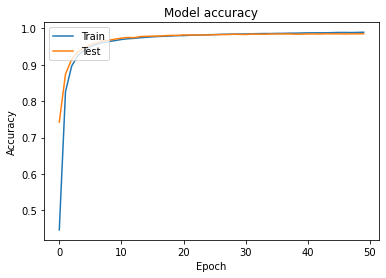

In [0]:
plt.plot(hist6.history['accuracy'])
plt.plot(hist6.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

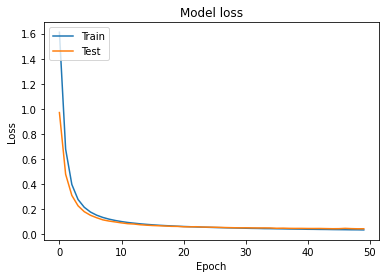

In [0]:
plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()